In [63]:
import keras
import tensorflow
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
from matplotlib import pyplot as plt
from tensorflow.keras.preprocessing import image
import numpy as np
import math
import sklearn

In [64]:
#Data Augmentation

datagen = ImageDataGenerator(
    rescale=1./255,               # Normalize pixel values to [0, 1]
    rotation_range=40,            # Rotate images randomly by up to 40 degrees
    width_shift_range=0.2,        # Shift images horizontally by up to 20% of the width
    height_shift_range=0.2,       # Shift images vertically by up to 20% of the height
    shear_range=0.2,              # Apply random shearing transformations
    zoom_range=0.2,               # Zoom into images randomly
    horizontal_flip=True,         # Flip images horizontally
    fill_mode='nearest',          # Fill new pixels with nearest value
    validation_split=0.2          # Reserve 20% of data for validation
)



In [65]:
classes=["Biodegradable","Non-biodegradable"]

In [67]:
# Create a training data generator
initial_generator = datagen.flow_from_directory(
    'Dataset\\train',        # Directory with training images
    target_size=(64, 64),   # Resize images to 64x64
    batch_size=1,           # Temporarily set batch size to 1
    class_mode='binary',    # Binary classification (2 classes)
    shuffle=False           # Keep order
)

total_images = len(initial_generator.filenames)

train_generator = datagen.flow_from_directory(
    'Dataset\\train',        
    target_size=(64, 64),   # Resize images to 64x64
    batch_size=total_images, # Load all images at once
    class_mode='binary',    
    shuffle=False           
)



Found 24737 images belonging to 2 classes.
Found 24737 images belonging to 2 classes.


In [68]:
# # Load a single image to visualize augmentations
# img_path = 'path_to_a_single_image.jpg'
# img = tf.keras.preprocessing.image.load_img(img_path, target_size=(64, 64))
# x = tf.keras.preprocessing.image.img_to_array(img)
# x = x.reshape((1,) + x.shape)

# # Generate augmented images
# i = 0
# for batch in datagen.flow(x, batch_size=1):
#     plt.figure(i)
#     imgplot = plt.imshow(batch[0].astype('uint8'))
#     i += 1
#     if i % 5 == 0:  # Display 5 images
#         break

# plt.show()

In [69]:
train_generator.class_indices

{'B': 0, 'N': 1}

In [70]:
type(train_generator)

keras.src.legacy.preprocessing.image.DirectoryIterator

In [71]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [72]:
images,labels=next(train_generator)
images.shape
# labels[:5]


c:\Users\Nilang\AppData\Local\Programs\Python\Python311\Lib\site-packages\PIL\Image.py:1000: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


(24737, 64, 64, 3)

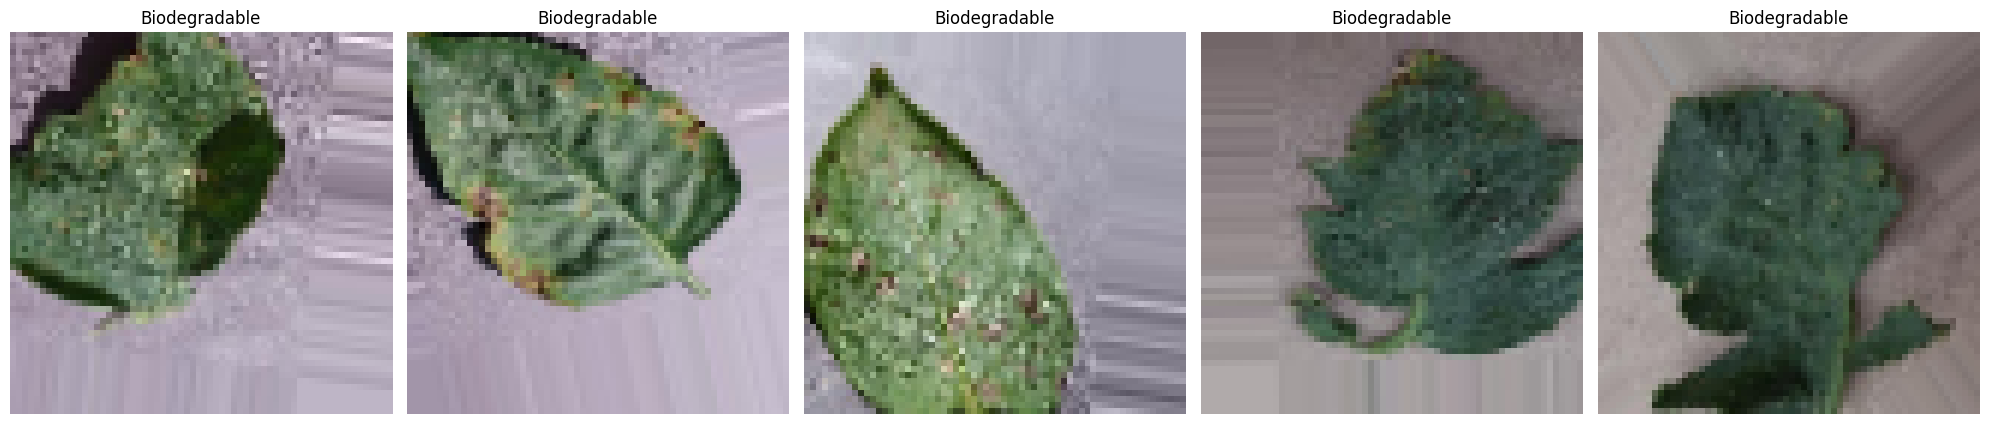

In [73]:
plot_augmented_images(images,labels)


In [74]:
labels

array([0., 0., 0., ..., 1., 1., 1.], dtype=float32)

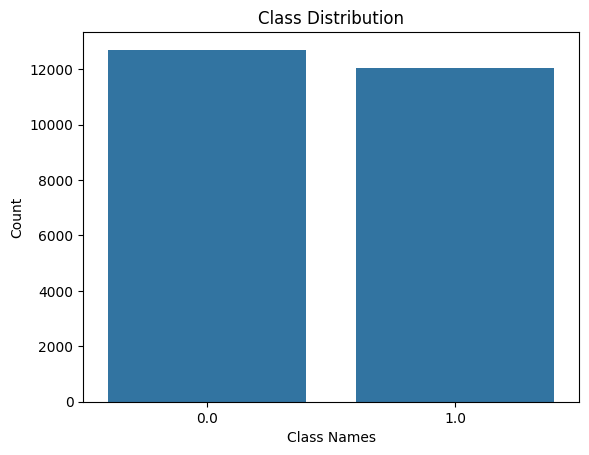

In [75]:
import seaborn as sns
sns.countplot(x = labels)
plt.title("Class Distribution")
plt.xlabel("Class Names")
plt.ylabel("Count")
plt.show()

In [76]:
from sklearn.model_selection import train_test_split

# Assuming you have lists of image file paths and labels
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)



In [77]:
X_train[0]

array([[[0.57806206, 0.49676877, 0.39014375],
        [0.5262225 , 0.45299315, 0.3705599 ],
        [0.47438297, 0.40921754, 0.35097608],
        ...,
        [0.62954867, 0.56409794, 0.4929017 ],
        [0.59247875, 0.5326118 , 0.46227568],
        [0.47771755, 0.41201472, 0.35467005]],

       [[0.7096968 , 0.605973  , 0.4591119 ],
        [0.67168117, 0.5748693 , 0.4349201 ],
        [0.6330733 , 0.5432226 , 0.41092575],
        ...,
        [0.6267472 , 0.5631641 , 0.4910341 ],
        [0.5681997 , 0.5073989 , 0.44079804],
        [0.4525047 , 0.38493422, 0.32852337]],

       [[0.7516893 , 0.63796383, 0.4773821 ],
        [0.7597533 , 0.6460278 , 0.48775   ],
        [0.7500383 , 0.63897973, 0.4847838 ],
        ...,
        [0.6239458 , 0.5622303 , 0.48916647],
        [0.5439206 , 0.48218602, 0.4193204 ],
        [0.42729178, 0.35785368, 0.30237666]],

       ...,

       [[0.6049997 , 0.4953887 , 0.30117416],
        [0.63412756, 0.5312963 , 0.32654396],
        [0.83186567, 0

In [78]:
X_train.shape

(19789, 64, 64, 3)

In [79]:
X_test.shape

(4948, 64, 64, 3)

In [80]:
# val_generator = datagen.flow_from_directory(
#     '',
#     target_size=(64, 64),
#     batch_size=32,
#     class_mode='binary'
# )

In [81]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Input, Flatten, Dense

ann = Sequential([
    Input(shape=(64, 64, 3)), 
    Flatten(),                   
    Dense(1200, activation='relu'),
    Dense(300, activation='relu'),
    Dense(1, activation='sigmoid'),  # Use sigmoid for binary classification
])


In [82]:
learning_rate=0.0001
optimizer = Adam(learning_rate=learning_rate)
ann.compile(
    optimizer=optimizer,                  
    loss='binary_crossentropy',      
    metrics=['accuracy']  # Evaluate the model using accuracy
)

In [83]:
ann.fit(X_train,y_train,epochs=5,batch_size=32);

Epoch 1/5
619/619 ━━━━━━━━━━━━━━━━━━━━ 50s 77ms/step - accuracy: 0.7443 - loss: 0.5282
Epoch 2/5
619/619 ━━━━━━━━━━━━━━━━━━━━ 46s 74ms/step - accuracy: 0.7976 - loss: 0.4485
Epoch 3/5
619/619 ━━━━━━━━━━━━━━━━━━━━ 46s 75ms/step - accuracy: 0.8078 - loss: 0.4292
Epoch 4/5
619/619 ━━━━━━━━━━━━━━━━━━━━ 46s 75ms/step - accuracy: 0.8131 - loss: 0.4222
Epoch 5/5
619/619 ━━━━━━━━━━━━━━━━━━━━ 47s 75ms/step - accuracy: 0.8184 - loss: 0.4109


In [84]:
labels

array([0., 0., 0., ..., 1., 1., 1.], dtype=float32)

In [85]:
ann.evaluate(X_test,y_test)

155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8259 - loss: 0.3800


[0.3929343521595001, 0.8253840208053589]

In [86]:
from sklearn.metrics import classification_report

# Predict the labels
y_pred = (ann.predict(X_test) > 0.5).astype("int32")

# Generate the classification report
report = classification_report(y_test, y_pred, zero_division=1)
print(report) 


155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step
              precision    recall  f1-score   support

         0.0       0.85      0.81      0.83      2601
         1.0       0.80      0.84      0.82      2347

    accuracy                           0.83      4948
   macro avg       0.83      0.83      0.83      4948
weighted avg       0.83      0.83      0.83      4948



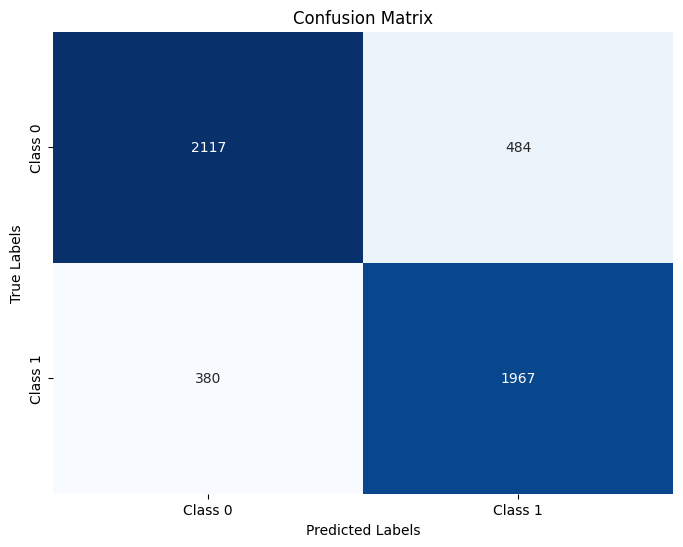

In [87]:

from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Class 0', 'Class 1'], 
            yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


In [88]:
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print("Confusion Matrix:\n", cm)


Confusion Matrix:
 [[2117  484]
 [ 380 1967]]


In [89]:
# Print the first few true labels and predictions
for i in range(10):
    print(f"True Label: {y_test[i]}, Predicted Label: {y_pred[i]}")


True Label: 1.0, Predicted Label: [1]
True Label: 0.0, Predicted Label: [0]
True Label: 1.0, Predicted Label: [1]
True Label: 1.0, Predicted Label: [1]
True Label: 1.0, Predicted Label: [1]
True Label: 0.0, Predicted Label: [0]
True Label: 1.0, Predicted Label: [1]
True Label: 0.0, Predicted Label: [0]
True Label: 1.0, Predicted Label: [1]
True Label: 1.0, Predicted Label: [1]


In [90]:
unique, counts = np.unique(y_test, return_counts=True)
print("Class distribution in y_test:", dict(zip(unique, counts)))


Class distribution in y_test: {0.0: 2601, 1.0: 2347}


In [91]:
from sklearn.metrics import classification_report

# Calculate the classification report
report = classification_report(y_test, y_pred, zero_division=1)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

         0.0       0.85      0.81      0.83      2601
         1.0       0.80      0.84      0.82      2347

    accuracy                           0.83      4948
   macro avg       0.83      0.83      0.83      4948
weighted avg       0.83      0.83      0.83      4948



In [92]:
from keras.applications.vgg16 import VGG16
from keras.callbacks import EarlyStopping
vgg16_model = Sequential()

vgg16_base = VGG16(
    include_top = False,
    weights = "imagenet",
    input_shape = (64,64,3),
    pooling = 'max'
)

print(f"Number of layers in Inception: {len(vgg16_base.layers)}")

for layer in vgg16_base.layers[:]:
    layer.trainable = False
    
for layer in vgg16_base.layers[16:]:
    layer.trainable = True
    
vgg16_model.add(vgg16_base)

vgg16_model.add(Flatten())

vgg16_model.add(Dense(units = 2, activation = 'softmax'))

vgg16_model.summary()

early_stopping = EarlyStopping( monitor = 'val_accuracy', mode = 'max', min_delta = 1,patience = 20,restore_best_weights = True,verbose = 0)

vgg16_model.compile(optimizer = keras.optimizers.RMSprop(learning_rate = 0.001) , loss = 'sparse_categorical_crossentropy' ,metrics = ['accuracy'])

vgg16 = vgg16_model.fit(X_train, y_train, batch_size = 64, epochs = 10, callbacks = [early_stopping])

vgg16_model.save('vgg16_model.h5')

Number of layers in Inception: 20


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 512)            │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 2)              │         1,026 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,715,714 (56.14 MB)

 Trainable params: 4,720,642 (18.01 MB)

 Non-trainable params: 9,995,072 (38.13 MB)

Epoch 1/10
310/310 ━━━━━━━━━━━━━━━━━━━━ 180s 577ms/step - accuracy: 0.7768 - loss: 1.7102
Epoch 2/10


c:\Users\Nilang\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\callbacks\early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)


310/310 ━━━━━━━━━━━━━━━━━━━━ 177s 570ms/step - accuracy: 0.8890 - loss: 0.2808
Epoch 3/10
310/310 ━━━━━━━━━━━━━━━━━━━━ 191s 617ms/step - accuracy: 0.9060 - loss: 0.2345
Epoch 4/10
310/310 ━━━━━━━━━━━━━━━━━━━━ 176s 569ms/step - accuracy: 0.9197 - loss: 0.1965
Epoch 5/10
310/310 ━━━━━━━━━━━━━━━━━━━━ 1163s 4s/step - accuracy: 0.9370 - loss: 0.1628
Epoch 6/10
310/310 ━━━━━━━━━━━━━━━━━━━━ 170s 548ms/step - accuracy: 0.9484 - loss: 0.1320
Epoch 7/10
310/310 ━━━━━━━━━━━━━━━━━━━━ 153s 493ms/step - accuracy: 0.9585 - loss: 0.1089
Epoch 8/10
310/310 ━━━━━━━━━━━━━━━━━━━━ 156s 504ms/step - accuracy: 0.9680 - loss: 0.0817
Epoch 9/10
310/310 ━━━━━━━━━━━━━━━━━━━━ 175s 563ms/step - accuracy: 0.9745 - loss: 0.0639
Epoch 10/10
310/310 ━━━━━━━━━━━━━━━━━━━━ 163s 527ms/step - accuracy: 0.9810 - loss: 0.0515


In [93]:
vgg16_predictions = vgg16_model.predict(X_test)
vgg16_predictions = np.argmax(vgg16_predictions,axis = 1)

155/155 ━━━━━━━━━━━━━━━━━━━━ 44s 283ms/step


In [94]:
vgg16_accuracy = vgg16_model.evaluate(X_test, y_test, verbose = 0) 
print('Test accuracy:', vgg16_accuracy[1])

Test accuracy: 0.905214250087738


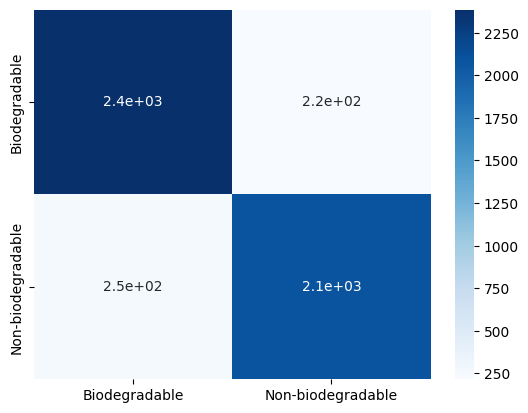

In [95]:
cm = confusion_matrix(y_test, vgg16_predictions)
sns.heatmap(cm,cmap = 'Blues',annot = True, xticklabels = classes, yticklabels = classes)
plt.show()



In [96]:
def scores(cm):
    p = {}
    r = {}
    f1 = {}
    
    for i in range(len(cm)):
        p[i] = cm[i,i] / sum(cm[:,i])
        r[i] = cm[i,i] / sum(cm[i,:])
        f1[i] = 2 * (cm[i,i] / sum(cm[:,i])) * (cm[i,i]/sum(cm[i,:])) / ((cm[i,i] / sum(cm[:,i])) + (cm[i,i]/sum(cm[i,:])))
    
    return p,r,f1  


In [97]:
precision, recall, f1_score = scores(cm)

In [98]:
import pandas as pd
Evaluation = {
    'Precision' : precision,
    'Recall' : recall,
    'F1 Score' : f1_score
}

Result = pd.DataFrame(Evaluation)

Result

,Precision,Recall,F1 Score
0,0.904094,0.916955,0.910479
1,0.906494,0.892203,0.899291


In [99]:
import cv2

def capture_image_on_enter():
    # Open a connection to the webcam (default camera is usually 0)
    cap = cv2.VideoCapture(0)
    
    # Check if the webcam is opened correctly
    if not cap.isOpened():
        print("Error: Could not open webcam.")
        return None
    
    print("Press 'Enter' to capture the image.")
    
    while True:
        # Capture frame-by-frame
        ret, frame = cap.read()
        
        # Display the live video stream
        cv2.imshow('Live Feed - Press Enter to Capture', frame)
        
        # Wait for the Enter key to capture the image (key code 13)
        if cv2.waitKey(1) == 13:  # 13 is the Enter key
            break
    
    # Release the webcam and close any OpenCV windows
    cap.release()
    cv2.destroyAllWindows()
    
    if not ret:
        print("Error: Could not read image from webcam.")
        return None
    
    return frame

image = capture_image_on_enter()

if image is not None:
    
    cv2.imwrite('captured_image.jpg', image)
    
    print("Image captured and saved as 'captured_image.jpg'.")
else:
    print("No image captured.")


Press 'Enter' to capture the image.
Image captured and saved as 'captured_image.jpg'.


In [100]:
from tensorflow.keras.preprocessing import image
import numpy as np

# Assuming `model` is your trained model in the notebook

# Load an image file for testing
img_path = 'captured_image.jpg'
img = image.load_img(img_path, target_size=(64, 64))  # Adjust size as per your model's input

# Convert the image to a numpy array
img_array = image.img_to_array(img)

# Expand dimensions to match the model's input shape
img_array = np.expand_dims(img_array, axis=0)

# Normalize the image if your model requires it
img_array = img_array / 255.0  # Example normalization, adjust if needed

# Get the prediction
prediction = vgg16_model.predict(img_array)

# Print the prediction to understand its structure
print(prediction)

predicted_class = np.argmax(prediction[0])

if predicted_class >=0.5:
    print("The image is classified as non-Biodegradable")
else:
    print("The image is classified as Biodegradable")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
[[2.5312405e-04 9.9974686e-01]]
The image is classified as non-Biodegradable
